## Site Characteristics


In [9]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%run ../data_preparation.ipynb
%store -r merged_df

# Filtern der Daten für jede Site
df_site1 = merged_df[merged_df['siteID'] == '1']
df_site2 = merged_df[merged_df['siteID'] == '2']

Stored 'merged_df' (DataFrame)


### Site Characteristics for weekdays


C:\Users\Jasper\AppData\Local\Temp\ipykernel_17504\1690264444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_site1['weekday'] = df_site1['connectionTime'].dt.day_name()
C:\Users\Jasper\AppData\Local\Temp\ipykernel_17504\1690264444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_site2['weekday'] = df_site2['connectionTime'].dt.day_name()


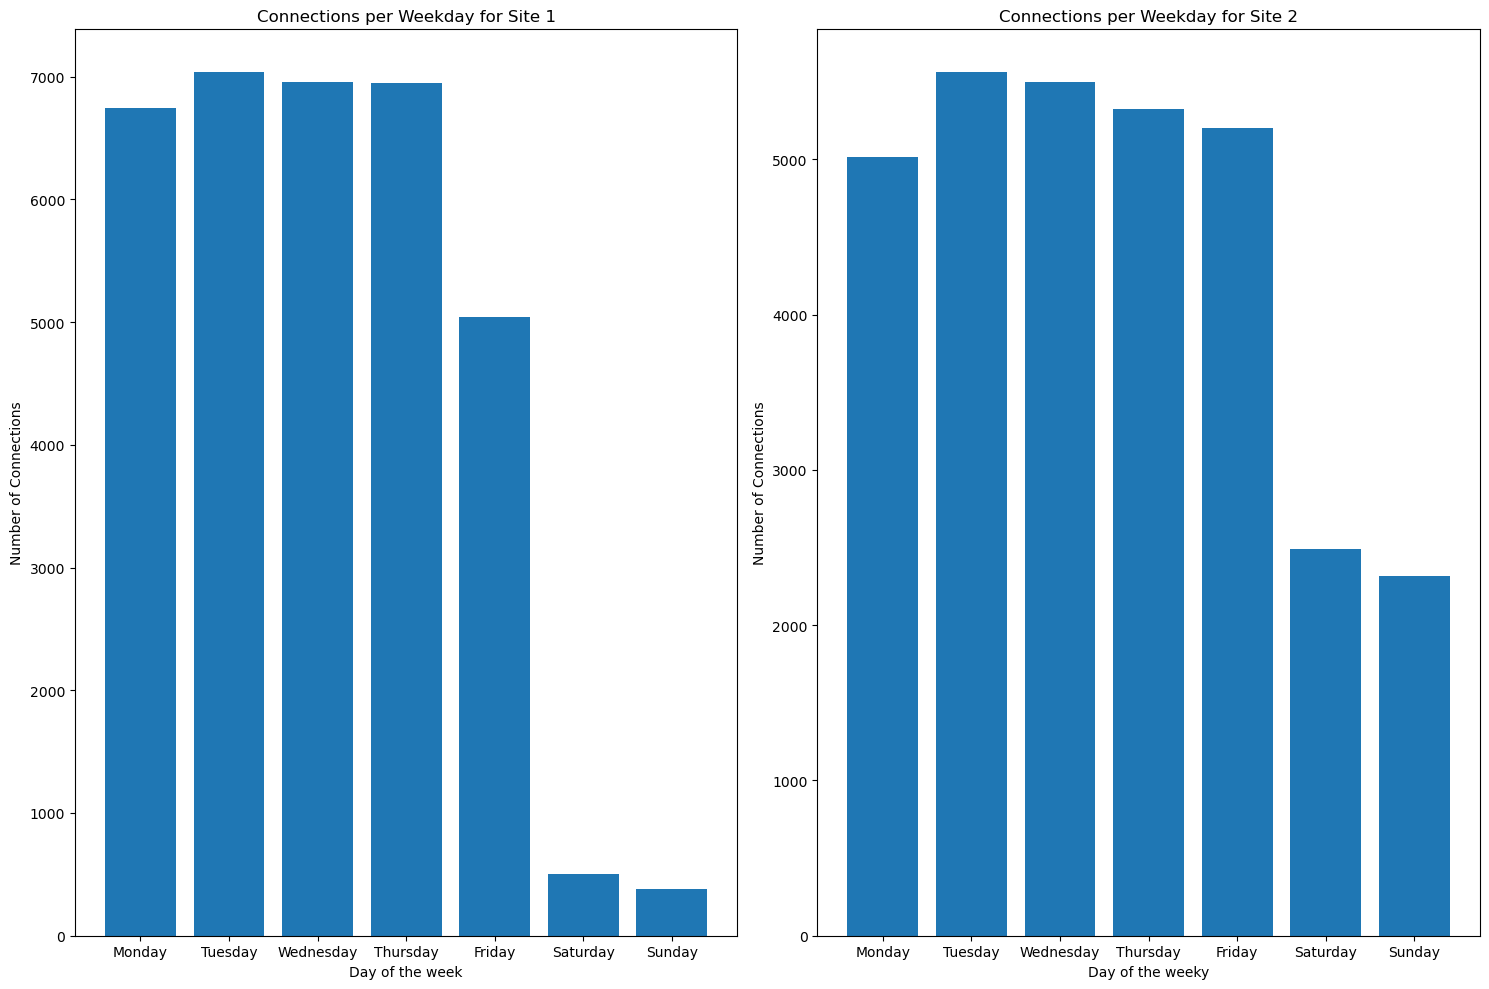

In [10]:

df_site1['weekday'] = df_site1['connectionTime'].dt.day_name()
df_site2['weekday'] = df_site2['connectionTime'].dt.day_name()


weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

connection_counts_site1 = df_site1['weekday'].value_counts().reindex(weekdays_order)
connection_counts_site2 = df_site2['weekday'].value_counts().reindex(weekdays_order)



fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Site 1 Connection
axs[0].bar(connection_counts_site1.index, connection_counts_site1.values)
axs[0].set_title('Connections per Weekday for Site 1')
axs[0].set_xlabel('Day of the week')
axs[0].set_ylabel('Number of Connections')

# Site 2 Connection
axs[1].bar(connection_counts_site2.index, connection_counts_site2.values)
axs[1].set_title('Connections per Weekday for Site 2')
axs[1].set_xlabel('Day of the weeky')
axs[1].set_ylabel('Number of Connections')

plt.tight_layout()
plt.show()


### Hourly Site Characteristics


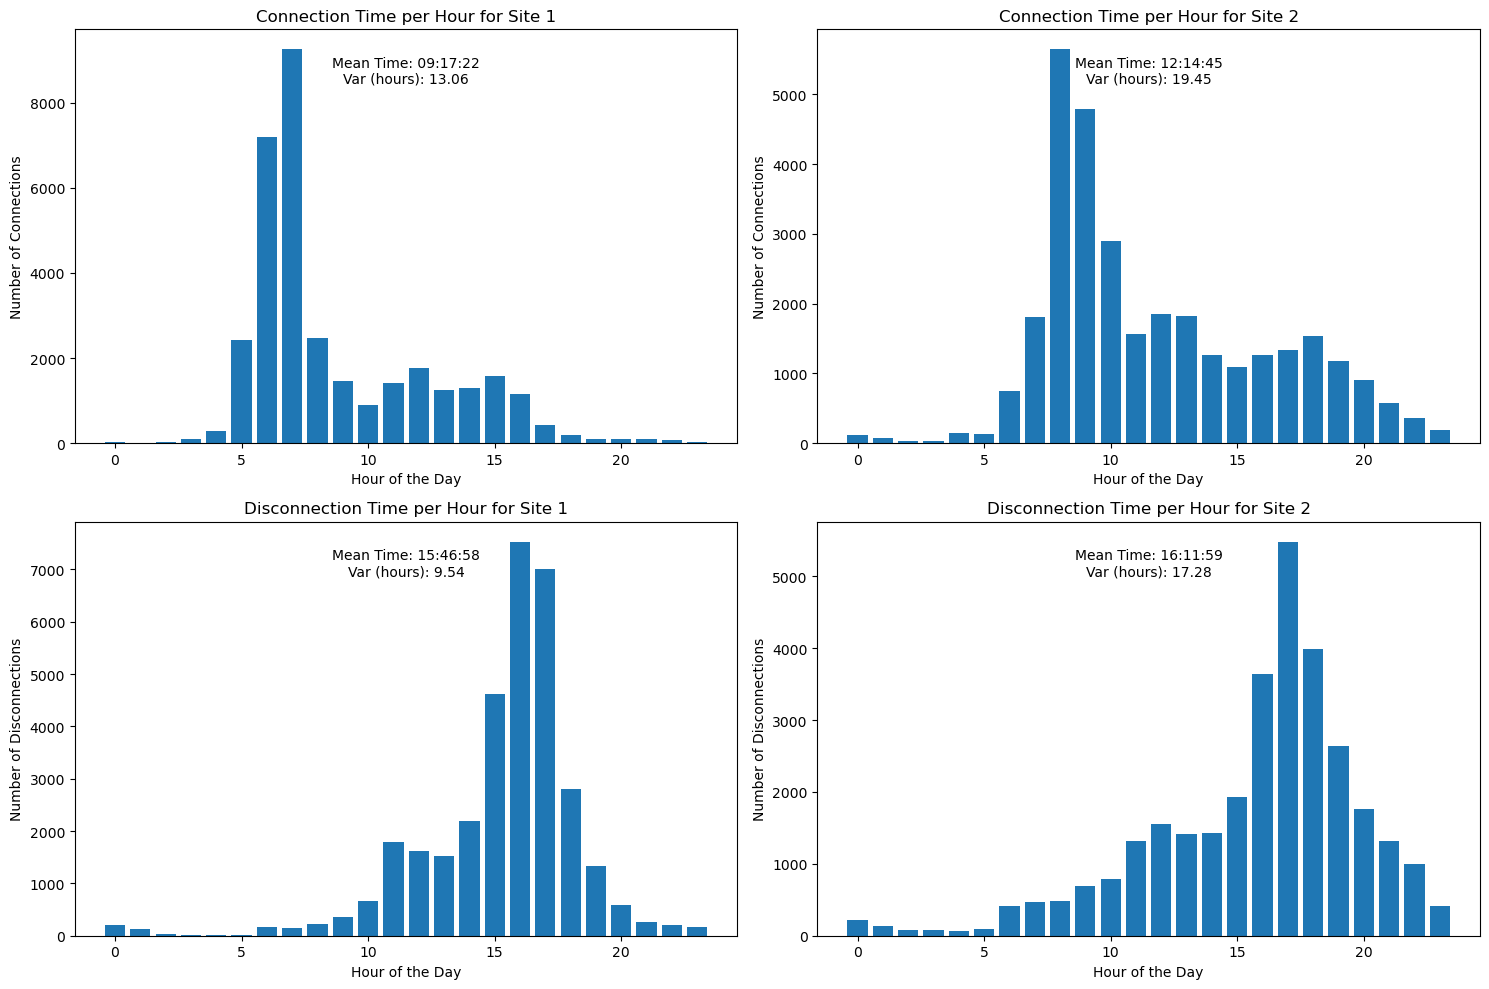

In [11]:


def calculate_average_time(df_column):
    # Konvertierung Zeit in Sekunden seit Mitternacht
    seconds_since_midnight = df_column.dt.hour * 3600 + df_column.dt.minute * 60 + df_column.dt.second
    
    # Berechnung des Durchschnitts
    average_seconds = seconds_since_midnight.mean()
    
    # Konvertierung zurück in ein Zeitformat
    average_time = (datetime.min + timedelta(seconds=int(average_seconds))).time()
    
    # Formatierung
    return average_time.strftime("%H:%M:%S")

def calculate_variance_in_hours(df_column):
    # Konvertierung Zeit in Sekunden seit Mitternacht
    seconds_since_midnight = df_column.dt.hour * 3600 + df_column.dt.minute * 60 + df_column.dt.second
    
    # Berechnung der Varianz und Umwandlung in Stunden
    variance_seconds = seconds_since_midnight.var()
    variance_hours = variance_seconds / (3600 * 3600)  # Da Varianz in Sekunden^2 ist
    
    return variance_hours

mean_conn_site1 = calculate_average_time(df_site1['connectionTime'])
mean_conn_site2 = calculate_average_time(df_site2['connectionTime'])

mean_disconn_site1 = calculate_average_time(df_site1['disconnectTime'])
mean_disconn_site2 = calculate_average_time(df_site2['disconnectTime'])

var_conn_site1 = calculate_variance_in_hours(df_site1['connectionTime'])
var_conn_site2 = calculate_variance_in_hours(df_site2['connectionTime'])

var_disconn_site1 = calculate_variance_in_hours(df_site1['disconnectTime'])
var_disconn_site2 = calculate_variance_in_hours(df_site2['disconnectTime'])



# Berechnen der Anzahl der Verbindungen pro Stunde für jede Site
connection_counts_site1 = df_site1['connectionTime'].dt.hour.value_counts().sort_index()
connection_counts_site2 = df_site2['connectionTime'].dt.hour.value_counts().sort_index()

# Berechnen der Anzahl der Trennungen pro Stunde für jede Site
disconnection_counts_site1 = df_site1['disconnectTime'].dt.hour.value_counts().sort_index()
disconnection_counts_site2 = df_site2['disconnectTime'].dt.hour.value_counts().sort_index()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Site 1 Connection
axs[0, 0].bar(connection_counts_site1.index, connection_counts_site1.values)
axs[0, 0].set_title('Connection Time per Hour for Site 1')
axs[0, 0].set_xlabel('Hour of the Day')
axs[0, 0].set_ylabel('Number of Connections')
axs[0, 0].text(0.5, 0.9, f'Mean Time: {mean_conn_site1}\nVar (hours): {var_conn_site1:.2f}', 
               horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transAxes)

# Site 2 Connection
axs[0, 1].bar(connection_counts_site2.index, connection_counts_site2.values)
axs[0, 1].set_title('Connection Time per Hour for Site 2')
axs[0, 1].set_xlabel('Hour of the Day')
axs[0, 1].set_ylabel('Number of Connections')
axs[0, 1].text(0.5, 0.9, f'Mean Time: {mean_conn_site2}\nVar (hours): {var_conn_site2:.2f}', 
               horizontalalignment='center', verticalalignment='center', transform=axs[0, 1].transAxes)

# Site 1 Disconnection
axs[1, 0].bar(disconnection_counts_site1.index, disconnection_counts_site1.values)
axs[1, 0].set_title('Disconnection Time per Hour for Site 1')
axs[1, 0].set_xlabel('Hour of the Day')
axs[1, 0].set_ylabel('Number of Disconnections')
axs[1, 0].text(0.5, 0.9, f'Mean Time: {mean_disconn_site1}\nVar (hours): {var_disconn_site1:.2f}', 
               horizontalalignment='center', verticalalignment='center', transform=axs[1, 0].transAxes)

# Site 2 Disconnection
axs[1, 1].bar(disconnection_counts_site2.index, disconnection_counts_site2.values)
axs[1, 1].set_title('Disconnection Time per Hour for Site 2')
axs[1, 1].set_xlabel('Hour of the Day')
axs[1, 1].set_ylabel('Number of Disconnections')
axs[1, 1].text(0.5, 0.9, f'Mean Time: {mean_disconn_site2}\nVar (hours): {var_disconn_site2:.2f}', 
               horizontalalignment='center', verticalalignment='center', transform=axs[1, 1].transAxes)


plt.tight_layout()
plt.show()

### Monthly Site Characteristics


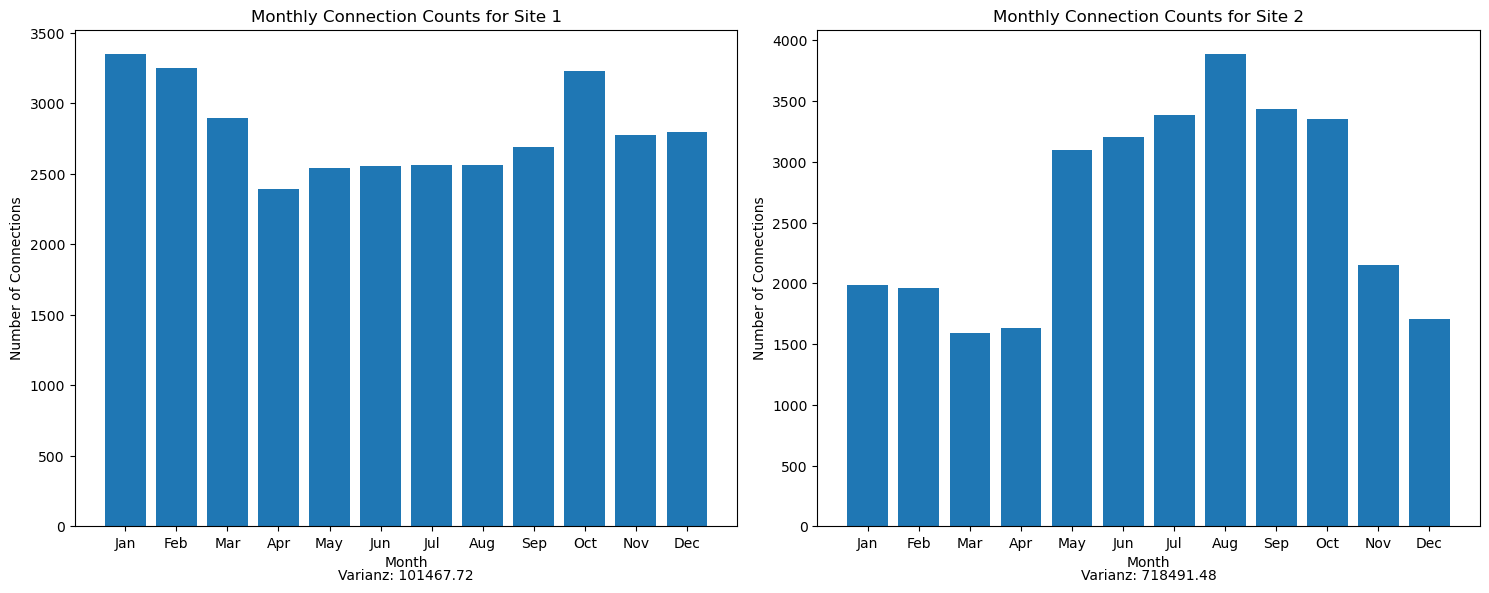

In [12]:

# Funktion zur Berechnung der Varianz der Verbindungen pro Monat
def calculate_monthly_variance(df):
    monthly_counts = df['connectionTime'].dt.month.value_counts().sort_index()
    variance = monthly_counts.var()
    return variance

connection_counts__month_site1 = df_site1['connectionTime'].dt.month.value_counts().sort_index()
connection_counts__month_site2 = df_site2['connectionTime'].dt.month.value_counts().sort_index()

variance_site1 = calculate_monthly_variance(df_site1)
variance_site2 = calculate_monthly_variance(df_site2)

# Plotten der Daten
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Site 1
monthly_counts_site1 = df_site1['connectionTime'].dt.month.value_counts().sort_index()
axs[0].bar(monthly_counts_site1.index, monthly_counts_site1.values)
axs[0].set_title('Monthly Connection Counts for Site 1')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Connections')
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[0].text(0.5, -0.1, f'Varianz: {variance_site1:.2f}', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

# Site 2
monthly_counts_site2 = df_site2['connectionTime'].dt.month.value_counts().sort_index()
axs[1].bar(monthly_counts_site2.index, monthly_counts_site2.values)
axs[1].set_title('Monthly Connection Counts for Site 2')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Connections')
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[1].text(0.5, -0.1, f'Varianz: {variance_site2:.2f}', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

plt.tight_layout()
plt.show()
